In [1]:
import models.channel_flow as chan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dns_retau180 = pd.read_csv('../machine-learning-turbulence/data/LM_Channel_Retau180.txt', delimiter=' ')

In [26]:
hypers = chan.get_hyperparams(ymin=-1, ymax=1, num_epochs=200000, lr=0.0001, num_layers=4, num_units=40)

In [27]:
hypers['nu']=0.005555555555
delta = (hypers['ymax']-hypers['ymin'])/2
reynolds_stress = chan.get_mixing_len_model(hypers['k'], delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
retau=chan.calc_retau(delta, hypers['dp_dx'], hypers['rho'], hypers['nu'])
print('Training at Retau={}'.format(retau))

Training at Retau=180.000000018


In [28]:
half_u180,  half_y180 = chan.convert_dns(delta, hypers, dns_retau180)

In [29]:
pdenn180 = chan.Chanflow(num_units=hypers['num_units'], num_layers=hypers['num_layers'])
losses180 = pdenn180.train(hypers['ymin'], hypers['ymax'],
                                   reynolds_stress,
                                   nu=hypers['nu'],
                                   dp_dx=hypers['dp_dx'],
                                   rho=hypers['rho'],
                                   batch_size=hypers['batch_size'],
                                   epochs=hypers['num_epochs'],
                                   lr=hypers['lr'],
                                   C=1)

100%|██████████| 200000/200000 [2:18:02<00:00, 24.15it/s, loss=0.03]    


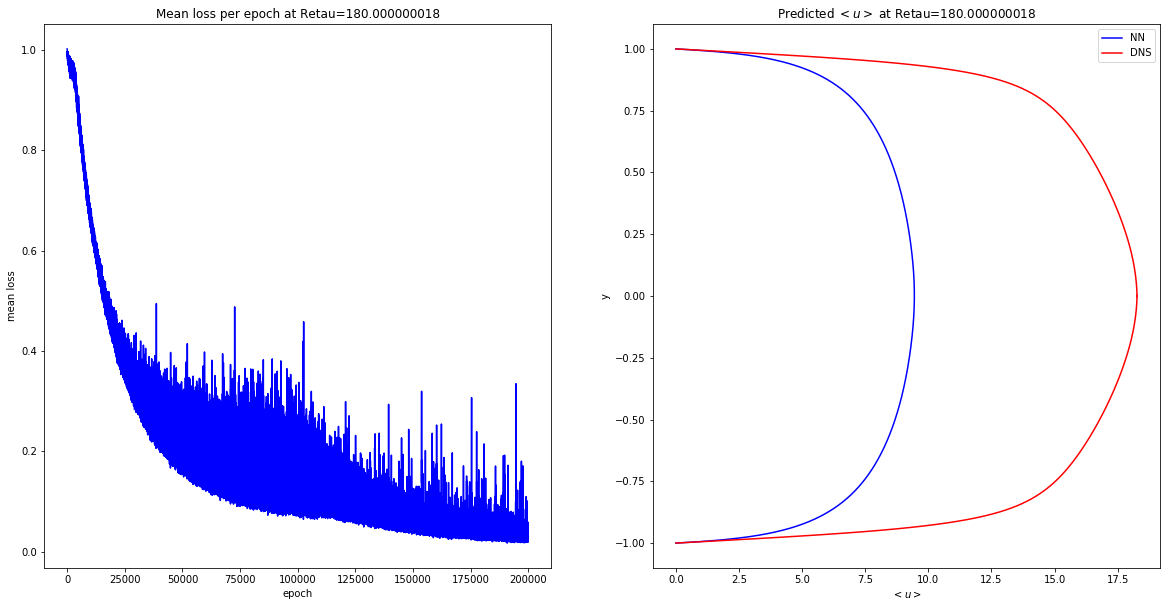

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
delta=1
chan.make_plots(ax, losses180, pdenn180, hypers, retau)
# chan.plot_dns(ax[1], half_u180, half_y180)
ax[1].plot(half_u180, half_y180-1, color='red', label='DNS')
ax[1].plot(half_u180, -half_y180+2*delta-1, color='red')
ax[1].legend()

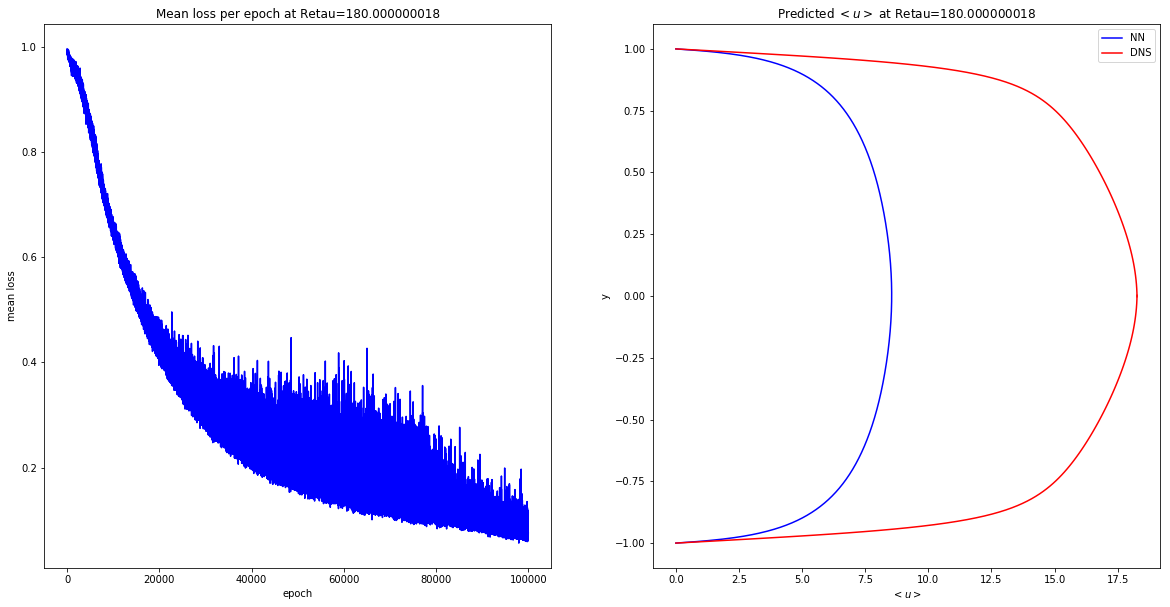

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
delta=1
chan.make_plots(ax, losses180, pdenn180, hypers, retau)
# chan.plot_dns(ax[1], half_u180, half_y180)
ax[1].plot(half_u180, half_y180-1, color='red', label='DNS')
ax[1].plot(half_u180, -half_y180+2*delta-1, color='red')
ax[1].legend()

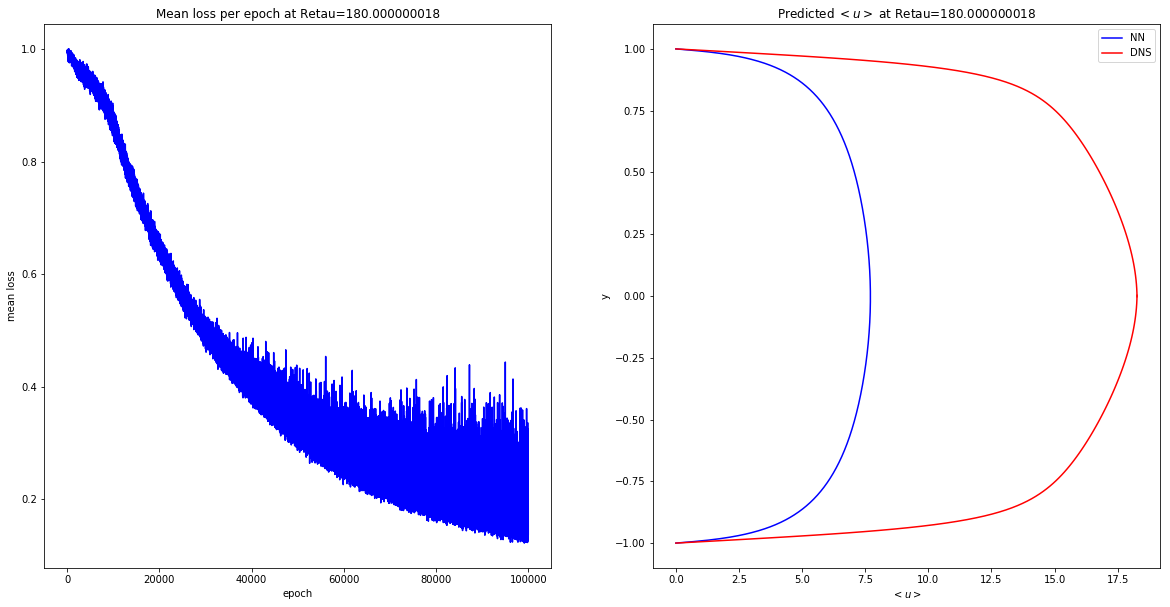

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
chan.make_plots(ax, losses180, pdenn180, hypers, retau)
chan.plot_dns(ax[1], half_u180, half_y180)